<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Quartile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/Thesis Project Kidney/Assign 3 : Re-CalculateSlope&Quartile/SlopeFiltered.xlsx')
slope.head()

,PatientUID,PatientVisitUID,ResultItemName,eGFR,datetime,slopes,time_diff
0,2299,3386255,eGFR(CKD-EPI) age >=18,71.7,2016-08-15 09:51:54.913,NaN,NaN
1,2299,4020970,eGFR(CKD-EPI) age >=18,67.2,2017-03-31 10:18:54.363,-0.019737,228.0
2,2299,4286612,eGFR(CKD-EPI) age >=18,69.2,2017-07-05 10:40:40.763,0.008475,236.0
3,2299,4546471,eGFR(CKD-EPI) age >=18,63.6,2017-10-03 09:19:54.710,-0.030270,185.0
4,2299,4801938,eGFR(CKD-EPI) age >=18,58.4,2018-01-04 09:03:28.847,-0.028571,182.0


In [3]:
slope.columns

Index(['PatientUID', 'PatientVisitUID', 'ResultItemName', 'eGFR', 'datetime',
       'slopes', 'time_diff'],
      dtype='object')

In [4]:
slope.dropna(subset=['slopes'], inplace=True)

In [5]:
import pandas as pd

# Assuming your data is in the 'slope' DataFrame
# Replace 'your_data.csv' with the path to your data file if reading from a CSV file.
# slope = pd.read_csv('your_data.csv')

# Step 1: Calculate the fixed median
fixed_median = 4

# Step 2: Sort the 'slopes' column
slope_sorted = slope.sort_values(by='slopes')

# Step 3: Divide the sorted 'slopes' column into quartiles
quartile_1 = slope_sorted['slopes'].quantile(0.25)
quartile_2 = slope_sorted['slopes'].quantile(0.5)  # Median
quartile_3 = slope_sorted['slopes'].quantile(0.75)

# Step 4: Create a new column to store the quartile group information
def assign_quartile_group(slope_val):
    if slope_val <= quartile_1:
        return 'Q1'
    elif slope_val <= quartile_2:
        return 'Q2'
    elif slope_val <= quartile_3:
        return 'Q3'
    else:
        return 'Q4'

slope['quartile_group'] = slope['slopes'].apply(assign_quartile_group)

# Output the updated DataFrame
slope

,PatientUID,PatientVisitUID,ResultItemName,eGFR,datetime,slopes,time_diff,quartile_group
1,2299,4020970,eGFR(CKD-EPI) age >=18,67.20,2017-03-31 10:18:54.363,-0.019737,228.0,Q2
2,2299,4286612,eGFR(CKD-EPI) age >=18,69.20,2017-07-05 10:40:40.763,0.008475,236.0,Q3
3,2299,4546471,eGFR(CKD-EPI) age >=18,63.60,2017-10-03 09:19:54.710,-0.030270,185.0,Q2
4,2299,4801938,eGFR(CKD-EPI) age >=18,58.40,2018-01-04 09:03:28.847,-0.028571,182.0,Q2
5,2299,5051781,eGFR(CKD-EPI) age >=18,62.40,2018-03-29 09:10:51.133,0.022727,176.0,Q3
...,...,...,...,...,...,...,...,...
292348,3410729,10571896,eGFR(CKD-EPI) age >=18,30.67,2023-04-10 12:40:40.630,-0.110060,167.0,Q1
292350,3432056,10306813,eGFR(CKD-EPI) age >=18,67.71,2023-01-27 12:22:43.000,-0.057442,43.0,Q1
292351,3432056,10312896,eGFR(CKD-EPI) age >=18,72.86,2023-01-30 16:16:45.013,0.245238,21.0,Q4
292352,3432056,10408954,eGFR(CKD-EPI) age >=18,68.69,2023-02-24 21:05:12.747,-0.148929,28.0,Q1


##**check**

In [6]:
slope[slope['slopes'] == float('inf')]

,PatientUID,PatientVisitUID,ResultItemName,eGFR,datetime,slopes,time_diff,quartile_group


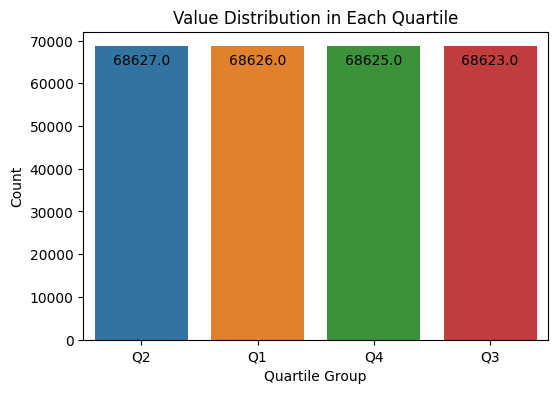

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated the 'quartile_group' column in the 'slope' DataFrame

# Step 1: Group the data by the 'quartile_group' and count the number of occurrences in each group
quartile_counts = slope['quartile_group'].value_counts()

# Step 2: Create a bar plot to visualize the quartile distribution with actual counts on top of each bar
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=quartile_counts.index, y=quartile_counts.values)
plt.xlabel('Quartile Group')
plt.ylabel('Count')
plt.title('Value Distribution in Each Quartile')

# Display the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -10), textcoords='offset points')

plt.show()


In [8]:
import pandas as pd

# Assuming you have already calculated the 'quartile_group' column in the 'slope' DataFrame

# Step 1: Group the data by the 'quartile_group'
grouped = slope.groupby('quartile_group')

# Step 2: Calculate the minimum and maximum values in each group
min_max_values = grouped['slopes'].agg(['min', 'max'])

# Output the minimum and maximum values in each quartile group
min_max_values

,min,max
quartile_group,,
Q1,-7.863333,-0.033862
Q2,-0.033857,-0.002455
Q3,-0.002455,0.028120
Q4,0.028122,5.976923


In [9]:
slope

,PatientUID,PatientVisitUID,ResultItemName,eGFR,datetime,slopes,time_diff,quartile_group
1,2299,4020970,eGFR(CKD-EPI) age >=18,67.20,2017-03-31 10:18:54.363,-0.019737,228.0,Q2
2,2299,4286612,eGFR(CKD-EPI) age >=18,69.20,2017-07-05 10:40:40.763,0.008475,236.0,Q3
3,2299,4546471,eGFR(CKD-EPI) age >=18,63.60,2017-10-03 09:19:54.710,-0.030270,185.0,Q2
4,2299,4801938,eGFR(CKD-EPI) age >=18,58.40,2018-01-04 09:03:28.847,-0.028571,182.0,Q2
5,2299,5051781,eGFR(CKD-EPI) age >=18,62.40,2018-03-29 09:10:51.133,0.022727,176.0,Q3
...,...,...,...,...,...,...,...,...
292348,3410729,10571896,eGFR(CKD-EPI) age >=18,30.67,2023-04-10 12:40:40.630,-0.110060,167.0,Q1
292350,3432056,10306813,eGFR(CKD-EPI) age >=18,67.71,2023-01-27 12:22:43.000,-0.057442,43.0,Q1
292351,3432056,10312896,eGFR(CKD-EPI) age >=18,72.86,2023-01-30 16:16:45.013,0.245238,21.0,Q4
292352,3432056,10408954,eGFR(CKD-EPI) age >=18,68.69,2023-02-24 21:05:12.747,-0.148929,28.0,Q1


In [10]:
# Count the number of records in each group
group_counts = slope['quartile_group'].value_counts()

# Iterate over quartile groups and print the count
for group_label, count in group_counts.items():
    print(f'Quartile Group {group_label}: {count} records')

Quartile Group Q2: 68627 records
Quartile Group Q1: 68626 records
Quartile Group Q4: 68625 records
Quartile Group Q3: 68623 records


In [11]:
quartile = slope[['PatientUID','PatientVisitUID','eGFR','datetime','slopes','time_diff','quartile_group']]
quartile

,PatientUID,PatientVisitUID,eGFR,datetime,slopes,time_diff,quartile_group
1,2299,4020970,67.20,2017-03-31 10:18:54.363,-0.019737,228.0,Q2
2,2299,4286612,69.20,2017-07-05 10:40:40.763,0.008475,236.0,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,-0.030270,185.0,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,-0.028571,182.0,Q2
5,2299,5051781,62.40,2018-03-29 09:10:51.133,0.022727,176.0,Q3
...,...,...,...,...,...,...,...
292348,3410729,10571896,30.67,2023-04-10 12:40:40.630,-0.110060,167.0,Q1
292350,3432056,10306813,67.71,2023-01-27 12:22:43.000,-0.057442,43.0,Q1
292351,3432056,10312896,72.86,2023-01-30 16:16:45.013,0.245238,21.0,Q4
292352,3432056,10408954,68.69,2023-02-24 21:05:12.747,-0.148929,28.0,Q1


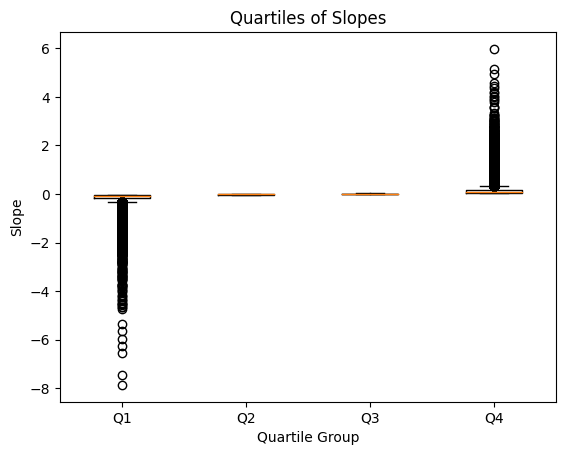

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the quartiles and assign quartile labels
slope['quartile_group'] = pd.qcut(slope['slopes'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Create a boxplot to visualize the quartiles
plt.boxplot([slope[slope['quartile_group'] == 'Q1']['slopes'],
             slope[slope['quartile_group'] == 'Q2']['slopes'],
             slope[slope['quartile_group'] == 'Q3']['slopes'],
             slope[slope['quartile_group'] == 'Q4']['slopes']],
            labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.xlabel('Quartile Group')
plt.ylabel('Slope')
plt.title('Quartiles of Slopes')
plt.show()

In [13]:
quartile.to_csv("Quartile.csv", index=False)

In [14]:
quartile.to_excel("Quartile.xlsx", index=False)